# Building a Handwritten Digits Classifier

## Displaying the Image Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold, cross_validate
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn import metrics
%matplotlib inline

In [2]:
digits = load_digits()
df= pd.DataFrame(digits['data'])
print(df.shape)
df.head()

(1797, 64)


,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


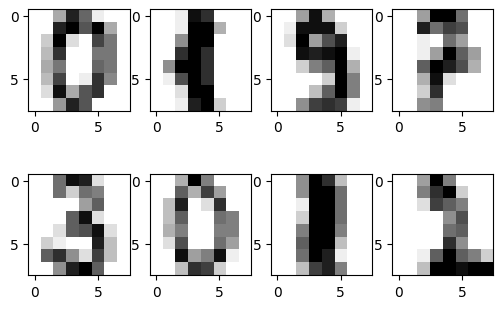

In [3]:
f, ax = plt.subplots(2, 4)
ax[0, 0].imshow(df.iloc[0].values.reshape(8,8), cmap='gray_r')
ax[0, 1].imshow(df.iloc[99].values.reshape(8,8), cmap='gray_r')
ax[0, 2].imshow(df.iloc[199].values.reshape(8,8), cmap='gray_r')
ax[0, 3].imshow(df.iloc[299].values.reshape(8,8), cmap='gray_r')

ax[1, 0].imshow(df.iloc[999].values.reshape(8,8), cmap='gray_r')
ax[1, 1].imshow(df.iloc[1099].values.reshape(8,8), cmap='gray_r')
ax[1, 2].imshow(df.iloc[1199].values.reshape(8,8), cmap='gray_r')
ax[1, 3].imshow(df.iloc[1299].values.reshape(8,8), cmap='gray_r')

## K-Nearest Neighbors Model

In [4]:
# Adding the target values to the data set
features = df.columns.to_list()
df = pd.concat([df, pd.DataFrame(digits['target'], columns=['target'])], axis=1)
target = 'target'

In [5]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [6]:
def knn_cross_validation(n, k):
    kf = KFold(n_splits=n, shuffle=True, random_state=321)
    model = KNeighborsClassifier(n_neighbors=k)
    accuracies = cross_validate(model, df[features], df[target], cv=kf,
                                scoring='accuracy',return_train_score=True)
    test_mean = np.mean(accuracies['test_score'])
    train_mean = np.mean(accuracies['train_score'])
    return test_mean, train_mean

knn_one_accuracy = knn_cross_validation(4, 1)
print('Test Accuracy: {}'.format(knn_one_accuracy[0]))
print('Train Accuracy: {}'.format(knn_one_accuracy[1]))

Test Accuracy: 0.986643157634249
Train Accuracy: 1.0


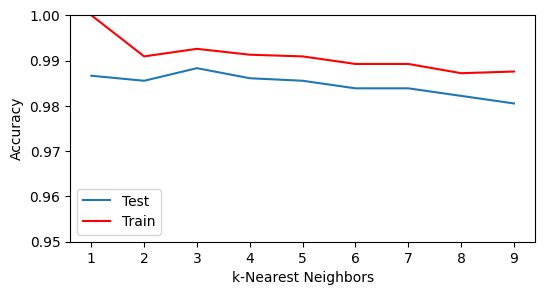

In [7]:
# Trying different values for k
k_values = range(1,10)
accs_test = []
accs_train = []
for k in k_values:
    acc_test = knn_cross_validation(4, k)[0]
    acc_train = knn_cross_validation(4, k)[1]
    accs_test.append(acc_test)
    accs_train.append(acc_train)

plt.figure(figsize=(6,3))
plt.plot(k_values, accs_test, label='Test')
plt.plot(k_values, accs_train, c='red', label='Train')
plt.ylim(0.95, 1)
plt.xlabel("k-Nearest Neighbors")
plt.ylabel("Accuracy")
plt.legend(loc="lower left")
plt.show()

Using 4-fold and iterating over many values of k, we can see that k=3 is the parameter that better fits into our k-nearest neighbors algorithm, reaching almost 99% of accuracy. We also can notice there isn't a serious overfitting problem, since the curves are very close to each other and the accuracy scale is shrunk.

## Neural Network with One Hidden Layer

In [8]:
def nn_cross_validation(n, k):
    kf = KFold(n_splits=n, shuffle=True, random_state=321)
    model = MLPClassifier(hidden_layer_sizes=(k,), activation='logistic',
                          max_iter=1000)
    nn = cross_validate(model, df[features], df[target],
                        scoring='accuracy', cv=kf, return_train_score=True)
    train_mean = np.mean(nn['train_score'])
    test_mean = np.mean(nn['test_score'])
    return train_mean, test_mean

# Testing for 4-fold validation and 10 neurons
nn_1 = nn_cross_validation(4, 10)
print('Train Accuracy: {}'.format(nn_1[0]))
print('Test Accuracy: {}'.format(nn_1[1]))

/dataquest/system/env/python3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.



Train Accuracy: 0.9964751596580157
Test Accuracy: 0.9393429844097995


/dataquest/system/env/python3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.

/dataquest/system/env/python3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.

/dataquest/system/env/python3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.

/dataquest/system/env/python3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.



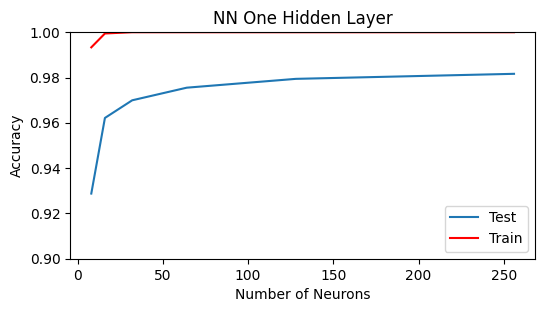

In [9]:
neurons = [8, 16, 32, 64, 128, 256]
accs_train = []
accs_test = []
for i in neurons:
    nn_results = nn_cross_validation(4, i)
    nn_train = nn_results[0]
    nn_test = nn_results[1]
    accs_train.append(nn_train)
    accs_test.append(nn_test)

plt.figure(figsize=(6,3))
plt.plot(neurons, accs_test, label='Test')
plt.plot(neurons, accs_train, c='red', label='Train')
plt.ylim(0.9, 1)
plt.xlabel("Number of Neurons")
plt.ylabel("Accuracy")
plt.title("NN One Hidden Layer")
plt.legend(loc="lower right")
plt.show()

It seems adding more neurons to the one hidden layer neural network model improves its accuracy to 98% and also we have less overfitting. However, even using this much more complex model, the k-Nearest Neighbors algorithm seems to have performed better (99%). Let's now use two hidden layers to our NN.

## Neural Network with Two Hidden Layer

In [10]:
def nn_two_cross_validation(n, k):
    kf = KFold(n_splits=n, shuffle=True, random_state=321)
    model = MLPClassifier(hidden_layer_sizes=(k,k), activation='logistic',
                          max_iter=1000)
    nn = cross_validate(model, df[features], df[target],
                        scoring='accuracy', cv=kf, return_train_score=True)
    train_mean = np.mean(nn['train_score'])
    test_mean = np.mean(nn['test_score'])
    return train_mean, test_mean

# Testing for 4-fold validation and 10 neurons
nn_2 = nn_two_cross_validation(4, 10)
print('Train Accuracy: {}'.format(nn_2[0]))
print('Test Accuracy: {}'.format(nn_2[1]))

Train Accuracy: 0.9977740676610733
Test Accuracy: 0.9215256124721602


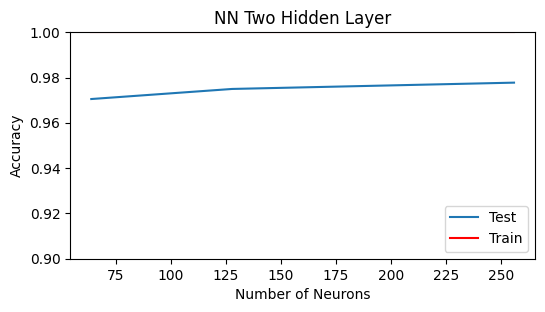

In [11]:
neurons = [64, 128, 256]
accs_train = []
accs_test = []
for i in neurons:
    nn_results = nn_two_cross_validation(4, i)
    nn_train = nn_results[0]
    nn_test = nn_results[1]
    accs_train.append(nn_train)
    accs_test.append(nn_test)

plt.figure(figsize=(6,3))
plt.plot(neurons, accs_test, label='Test')
plt.plot(neurons, accs_train, c='red', label='Train')
plt.ylim(0.9, 1)
plt.xlabel("Number of Neurons")
plt.ylabel("Accuracy")
plt.title("NN Two Hidden Layer")
plt.legend(loc="lower right")
plt.show()

Using more hidden layers is known to increase the amount of overfitting that happens. To help us prevent overfitting, let's increase the number of folds we use for k-fold cross validation to 6 while testing networks with 3 hidden layers.

## Neural Network with Three Hidden Layer

In [12]:
def nn_three_cross_validation(n, k):
    kf = KFold(n_splits=n, shuffle=True, random_state=321)
    model = MLPClassifier(hidden_layer_sizes=(k,k,k), activation='logistic',
                          max_iter=1000)
    nn = cross_validate(model, df[features], df[target],
                        scoring='accuracy', cv=kf, return_train_score=True)
    train_mean = np.mean(nn['train_score'])
    test_mean = np.mean(nn['test_score'])
    return train_mean, test_mean

# Testing for 6-fold validation and 10 neurons
nn_3 = nn_three_cross_validation(6, 10)
print('Train Accuracy: {}'.format(nn_3[0]))
print('Test Accuracy: {}'.format(nn_3[1]))

/dataquest/system/env/python3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.

/dataquest/system/env/python3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.

/dataquest/system/env/python3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.



Train Accuracy: 0.994435243428557
Test Accuracy: 0.8870234113712373


/dataquest/system/env/python3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.



/dataquest/system/env/python3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.

/dataquest/system/env/python3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.

/dataquest/system/env/python3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.

/dataquest/system/env/python3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.



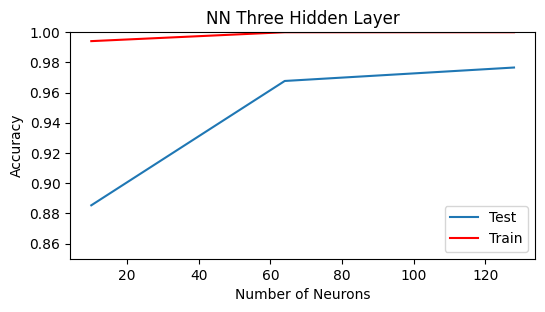

In [13]:
neurons = [10, 64, 128]
accs_train = []
accs_test = []
for i in neurons:
    nn_results = nn_three_cross_validation(6, i)
    nn_train = nn_results[0]
    nn_test = nn_results[1]
    accs_train.append(nn_train)
    accs_test.append(nn_test)

plt.figure(figsize=(6,3))
plt.plot(neurons, accs_test, label='Test')
plt.plot(neurons, accs_train, c='red', label='Train')
plt.ylim(0.85, 1)
plt.xlabel("Number of Neurons")
plt.ylabel("Accuracy")
plt.title("NN Three Hidden Layer")
plt.legend(loc="lower right")
plt.show()

It seems Neural Networks with three hidden layers and using 6 fold cross validation improves the test set accuracy to 97%. It still seems overfitted.